## Running Facebook Prophet model for forecasting Statistics Norway data via Statbank API

Inspired by [`Eurostat/Prophet`](https://github.com/eurostat/prophet) and [`stats_to_pandas`](https://github.com/hmelberg/stats-to-pandas). Result of internal hackathon at SSB.

---------

Facebook has open sourced [`Prophet`](https://facebookincubator.github.io/prophet/), a forecasting project available in `Python` and `R`.

At its core, the `Prophet` procedure is an **additive regression model** with four main components (based on [`Stan`](http://mc-stan.org) Bayesian approach):
1. a piecewise linear (or logistic) growth curve trend: `Prophet` automatically detects changes in trends by selecting changepoints from the data,
2. a yearly seasonal component modeled using Fourier series,
3. a weekly seasonal component using dummy variables,
4. a user-provided list of important holidays.

We (**make no assumption whatsoever here**, beyond the obvious seasonality of the data) use the features 1. and 2. of the model to **build forecast estimates of Statistics Norway timeseries using [*PX-API*](https://www.ssb.no/en/omssb/tjenester-og-verktoy/api/px-api) **:

<img src="">

We suppose here that all required packages have been already install (see `Prophet` original webpage for `Prophet`'s dependencies). Let us first import everything we need:

In [2]:
import pandas as pd
import numpy as np
# needed for display in notebook:
%matplotlib notebook 
from matplotlib import pyplot as plt
import APIdata as apid #separate file

import warnings
warnings.filterwarnings('ignore')


## Testing datasets from API:

In [3]:
statbank = apid.API_to_data(language='en')
statbank.search('macro*')

,table_title,score,published
table_id,,,
11721,Final expenditure and gross domestic product....,0.288675,2018-11-13T08:00:00
09190,Final expenditure and gross domestic product....,0.288675,2018-11-13T08:00:00
09189,Final expenditure and gross domestic product ...,0.288675,2018-08-23T08:00:00
08799,"External trade in goods, by commodity number ...",0.288675,2018-11-15T08:00:00
11008,"External trade in goods, by commodity number ...",0.288675,2018-11-15T08:00:00
08801,"External trade in goods, by commodity number ...",0.288675,2018-05-15T08:00:00
11009,"External trade in goods, by commodity number ...",0.288675,2018-05-15T08:00:00


Select table_id from the list above, and type between ' '

In [4]:
statbank = apid.API_to_data(language='en')
tablenr = '09190'   #måned eksempel: 11721, uke eksempel: 03024, kvartal eksempel: 09190, år eksempel 05803
box_info = statbank.select(tablenr)
box_info

Info is saved. You can now run the rest of the code :)


Run next cell when info is saved.

In [5]:
[df, label] = statbank.read_box(box_info)
df

,macroeconomic indicator,contents,quarter,value
0,¬ Household final consumption expenditure,Constant 2016-prices (NOK million),1978K1,111504
1,¬ Household final consumption expenditure,Constant 2016-prices (NOK million),1978K2,114414
2,¬ Household final consumption expenditure,Constant 2016-prices (NOK million),1978K3,114317
3,¬ Household final consumption expenditure,Constant 2016-prices (NOK million),1978K4,125395
4,¬ Household final consumption expenditure,Constant 2016-prices (NOK million),1979K1,116252
5,¬ Household final consumption expenditure,Constant 2016-prices (NOK million),1979K2,118765
6,¬ Household final consumption expenditure,Constant 2016-prices (NOK million),1979K3,117784
7,¬ Household final consumption expenditure,Constant 2016-prices (NOK million),1979K4,131702
8,¬ Household final consumption expenditure,Constant 2016-prices (NOK million),1980K1,120686
9,¬ Household final consumption expenditure,Constant 2016-prices (NOK million),1980K2,118940


The table contains exactly the data we need, let us store it into a `pandas.DataFrame` object as desired. As already mentioned, the input to `Prophet` is always a `pandas.DataFrame` object, and it must contain two columns: `ds` and `y`. 

In [6]:
[df, f, periods] = statbank.prepare_dataframe(df=df)
df.head()

,ds,y
0,1978-03-31 00:00:00,111504
1,1978-06-30 00:00:00,114414
2,1978-09-30 00:00:00,114317
3,1978-12-31 00:00:00,125395
4,1979-03-31 00:00:00,116252


In [7]:
type(df)

pandas.core.frame.DataFrame

<IPython.core.display.Javascript object>


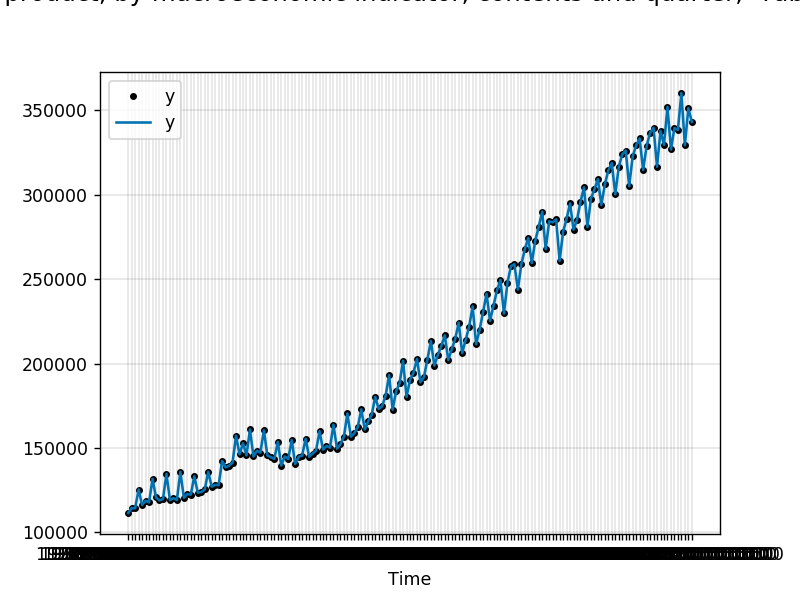

In [8]:
df.sort_values('ds', inplace=True)
ds_last = df['ds'].values[-1]
xlabel = "Time"
ylabel = "Value"  
plt.plot(df['ds'], df['y'], 'k.')
plt.plot(df['ds'], df['y'], ls='-', c='#0072B2')
plt.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
plt.xlabel(xlabel, fontsize=10); #plt.ylabel(ylabel, fontsize=10)
plt.suptitle(" {},  Table: {}  (last: {})".format(label, tablenr, ds_last), fontsize=14, y=1.03)
plt.legend()
plt.show()

Considering the trend observed in the data, we define the regression model for `Prophet` by instantiating a new `Prophet` model as follows:

Growth can be set to 'linear' eller 'logistic'. 
Possible to add parameter: seasonality_mode='additive' (default) or 'multiplicative'.
Possible to set Markov chain Monte Carlo (MCMC), e.g. mcmc_samples=300

In [9]:
from fbprophet import Prophet
nyears=4
m = Prophet(growth = 'linear', weekly_seasonality=False, yearly_seasonality=True, daily_seasonality=False)  

We then call its `fit` method and pass in the historical dataframe built earlier:

We extend the data into the future by a specified number periods using the `make_future_dataframe` method. Say that we consider to predict the time-series over the 4 next years:

In [10]:
m.fit(df)
future = m.make_future_dataframe(periods=periods*nyears, freq=f)
fcst = m.predict(future)

Let us plot the forecast estimates calculated by the `Prophet` model:

<IPython.core.display.Javascript object>


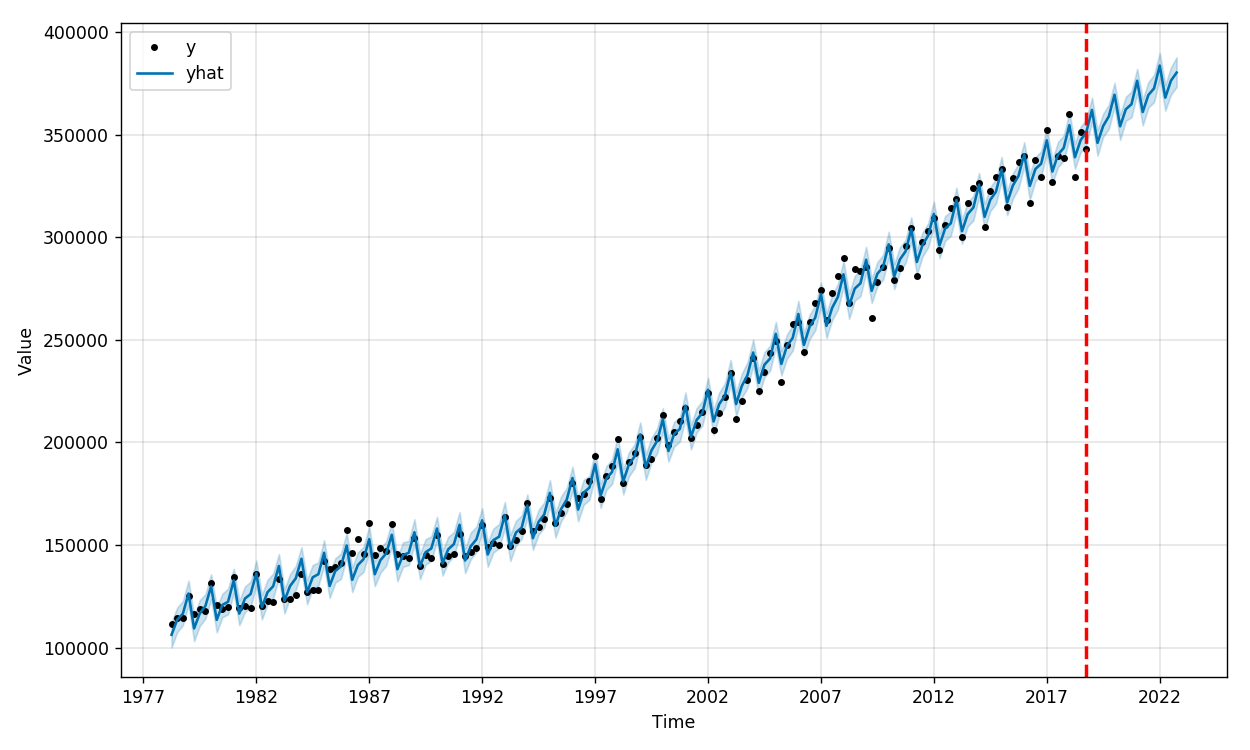

In [11]:
m.plot(fcst, uncertainty=True)
xlabel = "Time"
ylabel = "Value" 
plt.axvline(pd.to_datetime(ds_last), color='r', linestyle='--', lw=2)
plt.xlabel(xlabel, fontsize=10); plt.ylabel(ylabel, fontsize=10)
plt.suptitle(" {} {} forecast data ({} years)".format(tablenr, label, nyears), fontsize=14, y=1.05)
plt.legend()
plt.show()
plt.savefig("{}_{}y.svg".format(tablenr, nyears))

`Prophet` also provides with the components (overall trend and yearly profile) of the time-series:

<IPython.core.display.Javascript object>


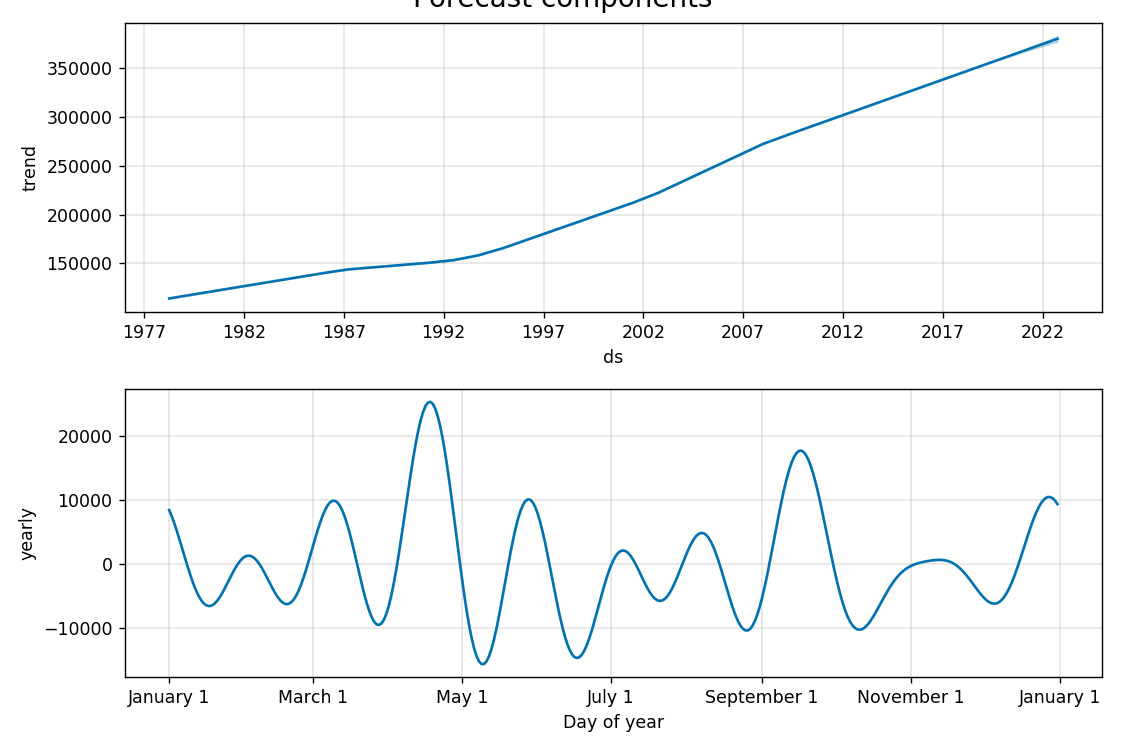

In [12]:
fig = m.plot_components(fcst, uncertainty=True)
fig.suptitle("Forecast components", fontsize=16, y=1.02)
plt.show()

In [13]:
result = pd.concat([fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], df['y']], axis=1)
result

,ds,yhat,yhat_lower,yhat_upper,y
0,1978-03-31,106268.807981,100117.227220,112495.844977,111504.0
1,1978-06-30,113558.459178,107531.727847,119465.468649,114414.0
2,1978-09-30,116513.898725,110932.208052,122720.763899,114317.0
3,1978-12-31,126374.215025,120763.270739,132616.965978,125395.0
4,1979-03-31,109380.128999,103209.108022,115511.328895,116252.0
5,1979-06-30,116623.855898,110585.467790,123142.743408,118765.0
6,1979-09-30,120319.356844,114214.211842,126082.334948,117784.0
7,1979-12-31,129873.102898,123642.974202,135742.686991,131702.0
8,1980-03-31,113535.123474,107456.933891,119544.996912,120686.0
9,1980-06-30,120828.051213,114824.010630,126286.016433,118940.0


In [14]:
result.tail()

,ds,yhat,yhat_lower,yhat_upper,y
174,2021-09-30,372465.975330,365787.865471,379071.920484,NaN
175,2021-12-31,383599.963189,377258.516191,389781.003789,NaN
176,2022-03-31,367965.440817,361620.861971,374082.008110,NaN
177,2022-06-30,376226.980858,369472.659361,382671.231176,NaN
178,2022-09-30,380164.989346,373167.717530,387619.596040,NaN


In [15]:
result.to_csv("{}_{}y.csv".format(tablenr, nyears), sep = ';', decimal = ',')

In [16]:
# result.to_excel("{}_{}y.xlsx".format(tablenr, nyears))

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**